a parte de limpesa de dados ela e relacionada e variada ou seja ela varia bastante

libs

In [3]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Para upload de arquivos no Colab
from google.colab import files

classe de leitura do dataset, estamos usando a entrada de arquivo do google colab mas pode ser editado para um caminho do seu sistema

metricas de avaliação ROC

conhecido como Curva de característica de operação do receptor

algortimos de classificacao

**Relação com a Área Sob a Curva (AUC-ROC)**

A **AUC-ROC** (Área Sob a Curva ROC) mede a capacidade do modelo de distinguir entre classes. Quanto maior a AUC (próxima de 1), melhor o modelo. A fórmula da AUC é calculada integrando a curva ROC:

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}) \, d(\text{FPR})
$$

tratamento de dados

Função para tratamento de dados nulos

Função para codificação de variáveis categóricas

input e visualização dos dados ja tratados, para o teste de performace

In [5]:
data = pd.read_csv("/content/campeonatos_futebol_atualizacao.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/campeonatos_futebol_atualizacao.csv'

In [ ]:
data.dtypes.value_counts()

A visualização dos tipos que são diferentes de objetos

In [ ]:
data.columns[data.dtypes != 'object']

fazendo a remoçao do objeto em todo dataset para aplicar o trenamento

In [ ]:
data_encoded = pd.get_dummies(data,columns=['Time 1', 'Time 2', 'Position 1', 'Position 2'],  # ou todas as colunas object
    drop_first=True    )

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [ ]:
data.columns[data.dtypes == 'object']

In [ ]:
treino_nr = data.columns[data.dtypes!= 'object']

definimos o nosso Y que sera a a saida do nosso codigo

nesse caso podemos subistuir para fazer a previsão com classificacao dos times que algoritmos de classifcacao como randomflorest se saira melhor

In [ ]:
data['winner'] = np.where(data['Gols 1'] > data['Gols 2'], 1,
                 np.where(data['Gols 1'] < data['Gols 2'], -1, 0))
label = 'winner' #definindo quem venceu na previsao

Separando a base de treino em X e Y, para prever o numero de gols e medir a performace dessa predição, a construção de X(features) e y(labels)

In [ ]:
x = data_encoded.drop(columns=[label])
y = data_encoded[label]

Separação das variaveis entre teste e validação

os parametros test_size estamos defindo a quantidade de 33 porcento do dataframe para testes o resto para a validacao e o random stage --- fazer

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.33, random_state=42)

Teste do primeiro algoritmo - Random florest

estamos usando o make_classification para generalizar o nosso data set

O algortimo que estamos usando seria RANDOM FLOREST CLASSIFIER

Uma floresta aleatória (random forest) é criada construindo um conjunto de árvores de decisão, cada uma das quais toma decisões ligeiramente diferentes.
No momento do teste (classificação), uma nova amostra é classificada por cada uma das árvores da floresta aleatória, e as distribuições de classes nos nós-folha finais são médias para fornecer uma resposta mais precisa do que seria possível com apenas uma única árvore (com uma profundidade fixa).

###  Previsão da Floresta Aleatória


#### Para classificação:

A previsão final \( \hat{y} \) é feita pela votação majoritária (**modo**):

$$
\hat{y} = \text{modo}(h_1(x), h_2(x), \dots, h_T(x))
$$

#### Para regressão:

A previsão final \( \hat{y} \) é feita pela **média das saídas** das árvores:

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^{T} h_t(x)
$$

---

### 🔧 Parâmetros de Projeto de uma Floresta Aleatória

- \( D \): profundidade máxima de cada árvore  
- \( T \): número total de árvores na floresta  
- \( \rho \): número de amostras examinadas em cada nó durante a construção


In [ ]:

clf_reg = RandomForestRegressor(max_depth=400, random_state=0)
clf_class = RandomForestClassifier(max_depth=420, random_state=42)

treinamento dos dados com o algortimo

In [ ]:
result_regressor=clf_reg.fit(x_train, y_train)
result_classifcator =clf_class.fit(x_train, y_train)

In [ ]:
y_pred_reg=result_regressor.predict(x_val)
y_pred_class=result_classifcator.predict(x_val)


teste para a acuracia desse algortimo

### 📊 Acurácia

A equação da acurácia é:

$$
\text{Acurácia} = \frac{\text{Número de previsões corretas}}{\text{Número total de previsões}}
$$

Usando a matriz de confusão:

$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Onde:

- \( TP \): Verdadeiros Positivos  
- \( TN \): Verdadeiros Negativos  
- \( FP \): Falsos Positivos  
- \( FN \): Falsos Negativos


temos o tratamento para o algoritimo de arvores tanto na regressao quanto na classificação

### 📊 Erro Absoluto Médio (MAE)

A equação do erro absoluto médio (MAE) é:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| \hat{y}_i - y_i \right|
$$

Onde:

- \( \hat{y}_i \): Valor previsto para a \( i \)-ésima amostra  
- \( y_i \): Valor verdadeiro da \( i \)-ésima amostra  
- \( n \): Número total de amostras

O erro absoluto médio mede a média das diferenças absolutas entre os valores previstos e os valores reais, fornecendo uma visão clara da precisão das previsões.


In [ ]:
print(result_regressor.predict(x_val))
mae = mean_absolute_error(y_val, y_pred_reg)
mse = mean_squared_error(y_val, y_pred_reg)
rmse = mse**0.5
r2  = r2_score(y_val, y_pred_reg)

plot do ramdomfloresregressor

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

#regr recebe a variavel treinada clf
regr = clf_reg

# 2) Previsões
y_pred = regr.predict(x_train)

# 3) Métricas (opcional)
r2   = r2_score(y_train, y_pred)
rmse = np.sqrt(mse)
print(f"R²: {r2:.3f}   RMSE: {rmse:.3f}")

# 4) Scatter real × previsto
plt.figure(figsize=(6,6))
plt.scatter(
    y_train,         # eixo X = valores reais
    y_pred,          # eixo Y = valores previstos
    c="navy",
    alpha=0.6,
    edgecolor="k",
    s=50,
    label="pontos"
)

# 5) Linha identidade
mn = min(y_train.min(), y_pred.min()) - 1
mx = max(y_train.max(), y_pred.max()) + 1
plt.plot([mn, mx], [mn, mx], "r--", label="identidade")

plt.xlim(mn, mx)
plt.ylim(mn, mx)
plt.xlabel("Valor real")
plt.ylabel("Valor previsto")
plt.title("RandomForestRegressor 1D: Real vs Previsto")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Acurácia:", accuracy_score(y_val, y_pred_class))

### Precisão (Precision)

A **Precisão**, também chamada de **Valor Preditivo Positivo**, é a fração de instâncias relevantes entre todas as instâncias recuperadas pelo modelo.

$$
\text{Precisão} = \frac{\text{Instâncias relevantes recuperadas}}{\text{Todas as instâncias recuperadas}}
$$

Substituindo os termos pelo vocabulário de classificação binária:

$$
\text{Precisão} = \frac{TP}{TP + FP}
$$

---

### Revocação (Recall ou Sensibilidade)

A **Revocação**, também chamada de **Sensibilidade**, é a fração de instâncias relevantes que foram efetivamente recuperadas pelo modelo.

$$
\text{Recall} = \frac{\text{Instâncias relevantes recuperadas}}{\text{Todas as instâncias relevantes}}
$$

Substituindo pelos termos da matriz de confusão:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

---

### Onde:

- **TP** = True Positives (Verdadeiros Positivos)  
- **FP** = False Positives (Falsos Positivos)  
- **FN** = False Negatives (Falsos Negativos)  

Tanto a **precisão** quanto a **revocação** são baseadas na noção de **relevância** das instâncias classificadas.


teste da matrix de confusão

### F₁ Score (F‑measure / Balanced F-score)

O **F₁ score** é a **média harmônica** entre _precision_ e _recall_, usada para avaliar o desempenho de modelos de classificação.

Fórmula geral:

$$
F_1 = \frac{2}{\frac{1}{\text{recall}} + \frac{1}{\text{precision}}}
$$

Forma mais comum (substituindo as fórmulas de precisão e recall):

$$
F_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$

Substituindo por valores de TP, FP e FN:

$$
F_1 = \frac{2 \cdot TP}{2 \cdot TP + FP + FN}
$$

---

### Onde:

- **TP** = True Positives (Verdadeiros Positivos)  
- **FP** = False Positives (Falsos Positivos)  
- **FN** = False Negatives (Falsos Negativos)

- **Precision** = \( \displaystyle \frac{TP}{TP + FP} \)  
- **Recall** = \( \displaystyle \frac{TP}{TP + FN} \)


expplicar sobre suporte

In [ ]:
features = [
    'Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
    'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
    'Faltas 1', 'Faltas 2', 'Cartões amarelos 1', 'Cartões amarelos 2',
    'Cartões vermelhos 1', 'Cartões vermelhos 2', 'Cruzamentos 1',
    'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
    'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2',
    'Gols 1', 'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2',
    'Tratamentos 1', 'Tratamentos 2', 'Substituições 1',
    'Substituições 2', 'Tiros-livres 1', 'Tiros-livres 2',
    'Defesas difíceis 1', 'Defesas difíceis 2', 'Posse 1(%)', 'Posse 2(%)'
]

In [ ]:
print(classification_report(y_val, y_pred_class, target_names=['Gols 1','Gols 2','empate']))

In [ ]:
print(confusion_matrix(y_val, y_pred_class))

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

confusion_matrix,
mapping = {0:"Gols 1", 1:"Gols 2",2: "empate"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(
    clf_class,                                      # seu modelo já treinado
    classes=['Gols 1','Gols 2','empate'],             # nome legível das classes
    label_encoder=mapping,                    # converte 0→"Gols 1", 1→"Gols 2"
    ax=ax
)
cm_viz.score(x_val, y_val)
cm_viz.show()

### 1. True Positive Rate (TPR / Sensibilidade)
A **taxa de verdadeiros positivos** indica o quão bem o modelo detecta os positivos reais.
Fórmula:
$$
\text{TPR} = \frac{TP}{TP + FN}
$$
Onde:  
- **TP** = True Positives (Verdadeiros Positivos)  
- **FN** = False Negatives (Falsos Negativos)
---
### 2. False Positive Rate (FPR)
A **taxa de falsos positivos** mostra com que frequência o modelo classifica incorretamente os negativos como positivos.
Fórmula:
$$
\text{FPR} = \frac{FP}{FP + TN}
$$
Onde:  
- **FP** = False Positives (Falsos Positivos)  
- **TN** = True Negatives (Verdadeiros Negativos)

algoritimo Based Gradient Boosting

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor(random_state=314)
#recebe as variaveis da main
hgb.fit(x_train, y_train)


In [ ]:
y_pred_based_gradient_boot = hgb.predict(x_train)
print("R²:", r2_score(y_train, y_pred))
mse = mean_squared_error(y_train, (y_pred_based_gradient_boot))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

hist_no_interact = HistGradientBoostingRegressor(
    interaction_cst=[[i] for i in range(x.shape[1])], random_state=0
)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    hgb, x_train,y_pred, kind="actual_vs_predicted", ax=axs[0]
)
_ = PredictionErrorDisplay.from_estimator(
    hgb, x_train, y_pred, kind="residual_vs_predicted", ax=axs[1]
)

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

_ = LearningCurveDisplay.from_estimator(
    hist_no_interact, x_train, y_pred, cv=5, n_jobs=2, train_sizes=np.linspace(0.1, 1, 50)
)

PARA MODIFICAR DEPOIS

In [5]:
from sklearn import datasets
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
#iris = datasets.load_iris()
diabetes = load_diabetes()

X = diabetes.data        # shape (150, 4)
Y = diabetes.target      # valores 0,1,2
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=0
)

Gaussian Process Classificação

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


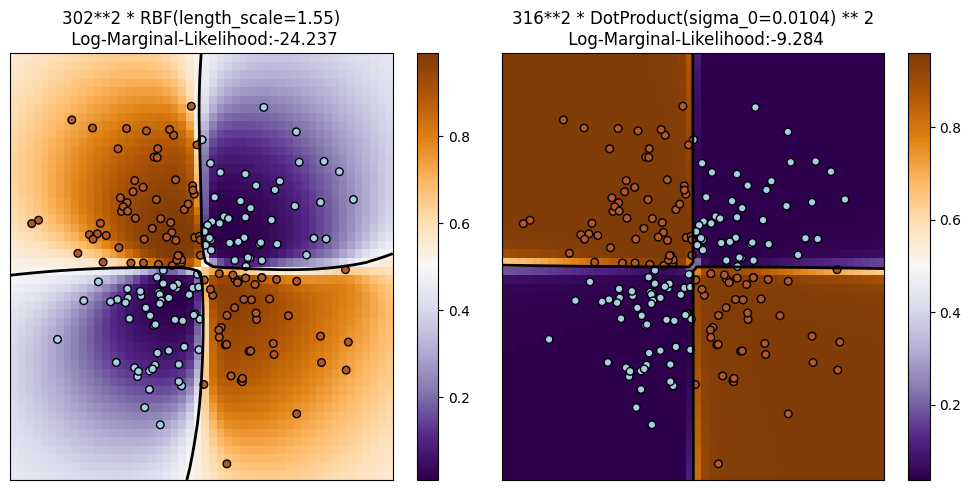

In [111]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)


# fit the model
plt.figure(figsize=(10, 5))
kernels = [1.0 * RBF(length_scale=1.15), 1.0 * DotProduct(sigma_0=1.0) ** 2]
for i, kernel in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X, Y)

    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 2, i + 1)
    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors=["k"])
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors=(0, 0, 0))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(
        "%s\n Log-Marginal-Likelihood:%.3f"
        % (clf.kernel_, clf.log_marginal_likelihood(clf.kernel_.theta)),
        fontsize=12,
    )

plt.tight_layout()
plt.show()

GaussianProcessRegressor

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


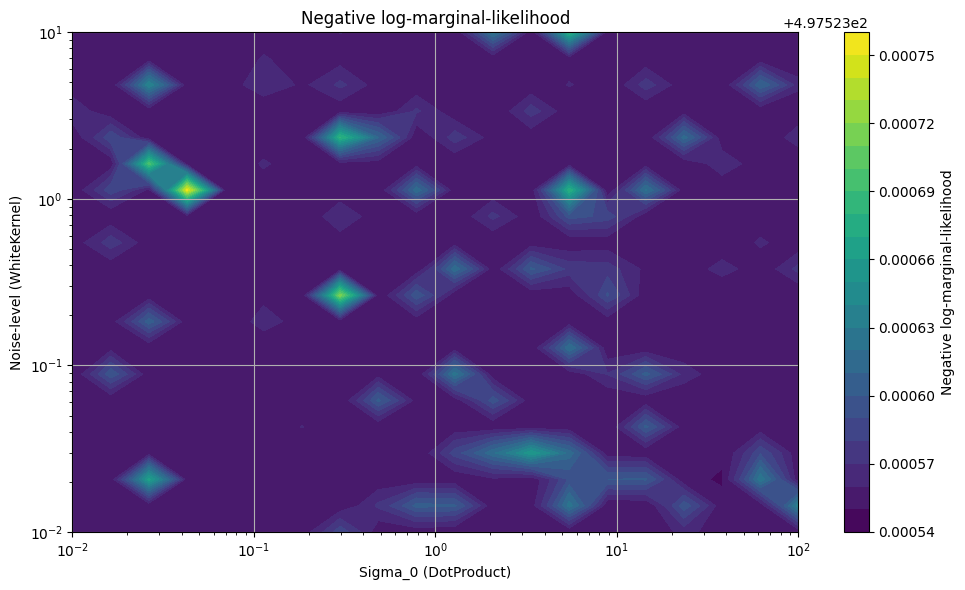

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar o dataset diabetes (substitua pelo seu)
diabetes = load_diabetes()
X = diabetes.data[:, 0].reshape(-1, 1)  # Usando apenas uma feature para simplificar
y = diabetes.target

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalonar os dados
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Definir os intervalos dos hiperparâmetros a serem explorados
param_grid = {
    "k1__sigma_0": np.logspace(-2, 2, 20),  # Variação para sigma_0 do DotProduct
    "k2__noise_level": np.logspace(-2, 1, 20), # Variação para noise_level do WhiteKernel
}

# Inicializar um array para armazenar os valores do NLML
nll_values = np.zeros((len(param_grid["k1__sigma_0"]), len(param_grid["k2__noise_level"])))

# Calcular o NLML para cada combinação de hiperparâmetros
for i, sigma_0 in enumerate(param_grid["k1__sigma_0"]):
    for j, noise_level in enumerate(param_grid["k2__noise_level"]):
        kernel = DotProduct(sigma_0=sigma_0) + WhiteKernel(noise_level=noise_level)
        gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
        gpr.fit(X_train_scaled, y_train_scaled)
        nll_values[i, j] = -gpr.log_marginal_likelihood(gpr.kernel_.theta)

# Criar o gráfico de contorno
plt.figure(figsize=(10, 6))
contour = plt.contourf(param_grid["k1__sigma_0"], param_grid["k2__noise_level"], nll_values.T, levels=20, cmap='viridis')
plt.colorbar(contour, label='Negative log-marginal-likelihood')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Sigma_0 (DotProduct)")
plt.ylabel("Noise-level (WhiteKernel)")
plt.title("Negative log-marginal-likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()

LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

#usar acuracioa e recall, f1-score e afins.
print("Acurácia:", accuracy_score(Y_test, Y_pred))
print("\nRelatório de classificação:")
print(classification_report(Y_test, Y_pred))

Acurácia: 0.00684931506849315

Relatório de classificação:
              precision    recall  f1-score   support

        42.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        51.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         2
        57.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         1
        61.0       0.00      0.00      0.00         1
        63.0       0.00      0.00      0.00         1
        64.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         3
        71.0       0.00      0.00      0.00         2
        72.0       0.01      1.00      0.03         1
        74.0       0.00      0.00      0.00         1
        75.0       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


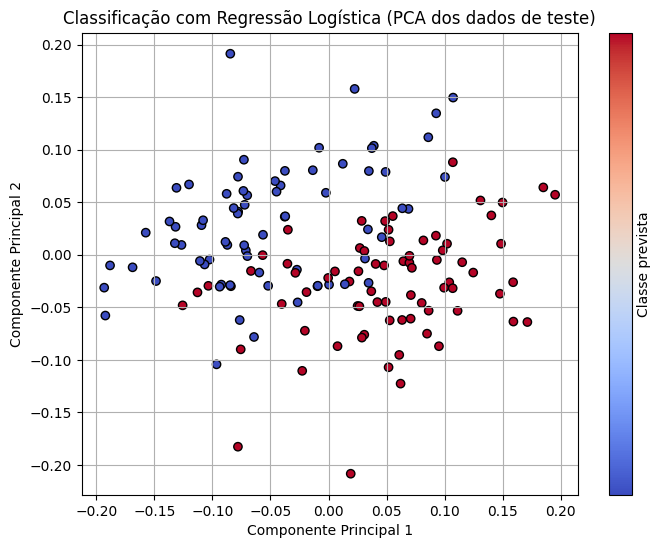

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_reduced = pca.fit_transform(X_test)

# Plotar os resultados da previsão
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_test_reduced[:, 0], X_test_reduced[:, 1],
    c=Y_pred, cmap='coolwarm', edgecolor='k'
)
plt.title("Classificação com Regressão Logística (PCA dos dados de teste)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, ticks=[0, 1], label='Classe prevista')
plt.grid(True)
plt.show()

In [42]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
#comparar o svr com linear, polinomio e rbf -> ESTA SEM O KERNEL
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, Y_train)
#para  poder modificar
y_pred_data = regr.predict(X_test)

print("SVR (Data) — R²:", r2_score(Y_test, y_pred_data))
mse = mean_squared_error(Y_test, y_pred_data)
rmse = np.sqrt(mse)
print("SVR (Data) — RMSE:", rmse)

SVR (Data) — R²: 0.12009333163601965
SVR (Data) — RMSE: 68.08513889394338


algortimo de SVR

Best SVR with params: {'C': 1.0, 'gamma': np.float64(0.01)} and R2 score: 0.457
SVR complexity and bandwidth selected and model fitted in 6.148 s
Best KRR with params: {'alpha': 1.0, 'gamma': np.float64(0.01)} and R2 score: 0.459
KRR complexity and bandwidth selected and model fitted in 5.110 s


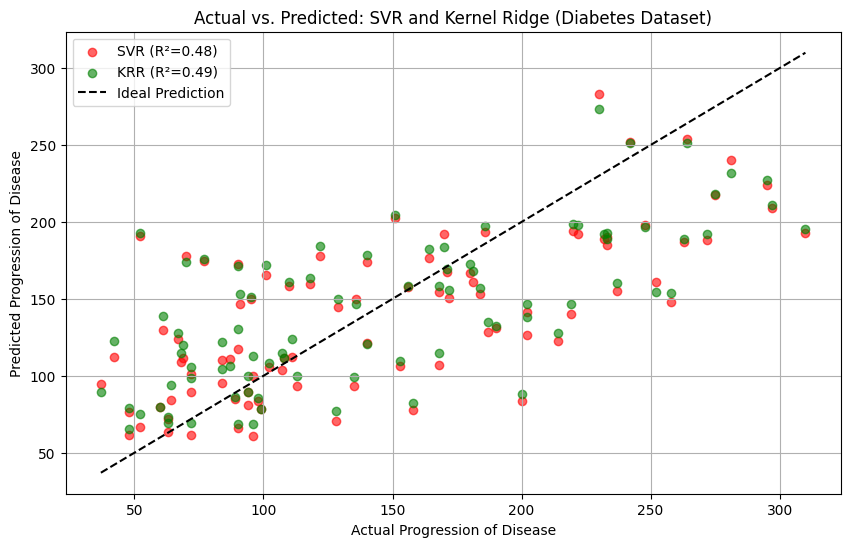

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
import time

# Carregar o dataset diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir os dados em treinamento e teste -> tirar futuramente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar as features e o target
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Treinar o modelo SVR com GridSearchCV
svr = GridSearchCV(
    SVR(kernel="rbf", gamma='scale'),
    param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
    cv=5,
    scoring='r2'
)
t0 = time.time()
svr.fit(X_train_scaled, y_train_scaled)
svr_fit = time.time() - t0
print(f"Best SVR with params: {svr.best_params_} and R2 score: {svr.best_score_:.3f}")
print("SVR complexity and bandwidth selected and model fitted in %.3f s" % svr_fit)

# Treinar o modelo Kernel Ridge Regression com GridSearchCV
kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma='scale'),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
    cv=5,
    scoring='r2'
)
t0 = time.time()
kr.fit(X_train_scaled, y_train_scaled)
kr_fit = time.time() - t0
print(f"Best KRR with params: {kr.best_params_} and R2 score: {kr.best_score_:.3f}")
print("KRR complexity and bandwidth selected and model fitted in %.3f s" % kr_fit)

# Fazer previsões nos dados de teste escalonados
y_svr_scaled_pred = svr.predict(X_test_scaled)
y_kr_scaled_pred = kr.predict(X_test_scaled)

# Inverter a escala das previsões
y_svr_pred = scaler_y.inverse_transform(y_svr_scaled_pred.reshape(-1, 1)).flatten()
y_kr_pred = scaler_y.inverse_transform(y_kr_scaled_pred.reshape(-1, 1)).flatten()
y_test_orig = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

svr_predict_time = 0  # Não estamos medindo o tempo de previsão separadamente aqui
kr_predict_time = 0

# Plotar os resultados (Valores Reais vs. Valores Previstos)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_svr_pred, color='red', alpha=0.6, label=f'SVR (R²={r2_score(y_test_orig, y_svr_pred):.2f})')
plt.scatter(y_test_orig, y_kr_pred, color='green', alpha=0.6, label=f'KRR (R²={r2_score(y_test_orig, y_kr_pred):.2f})')
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], '--', color='black', label='Ideal Prediction')
plt.xlabel('Actual Progression of Disease')
plt.ylabel('Predicted Progression of Disease')
plt.title('Actual vs. Predicted: SVR and Kernel Ridge (Diabetes Dataset)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

regressor linear bayesiano

### 📈 Regressão Bayesiana e Regularização

Técnicas de regressão bayesiana podem ser usadas para incluir **parâmetros de regularização** no procedimento de estimativa. Nessa abordagem:

- O parâmetro de regularização **não é definido rigidamente**, mas **ajustado com base nos dados**.
- Isso é feito introduzindo **priores não informativos** sobre os **hiperparâmetros** do modelo.

#### 🧠 Regularização como Prior Gaussiano

A regularização utilizada em métodos como **Ridge Regression** pode ser interpretada como uma **estimativa a posteriori máxima** (MAP – *Maximum A Posteriori*) com um **prior Gaussiano** sobre os coeficientes \( \mathbf{w} \), da seguinte forma:

$$
p(\mathbf{w}) = \mathcal{N}(\mathbf{w} \mid 0, \lambda^{-1} \mathbf{I})
$$

Onde:

- \( \mathbf{w} \): vetor de coeficientes do modelo  
- \( \lambda \): **precisão** (o inverso da variância) do prior Gaussiano  
- \( \lambda \) pode ser tratado como uma **variável aleatória** a ser estimada dos dados, ao invés de ser definida manualmente

#### 📊 Modelo Probabilístico Completo

Para obter um **modelo totalmente probabilístico**, assumimos que a saída \( y \) é **gaussianamente distribuída** ao redor de uma função linear \( \mathbf{x}^\top \mathbf{w} \):

$$
p(y \mid \mathbf{x}, \mathbf{w}, \beta) = \mathcal{N}(y \mid \mathbf{x}^\top \mathbf{w}, \beta^{-1})
$$

Onde:

- \( \beta \): **precisão do ruído** (o inverso da variância da distribuição do erro)
- \( \beta \) também pode ser tratado como uma **variável aleatória**, estimada a partir dos dados

---

Essa abordagem resulta em um modelo **mais flexível**, que pode **ajustar automaticamente** os níveis de regularização com base nas evidências fornecidas pelos dados.


In [66]:
from sklearn import linear_model

diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target



BayesianRidge()

In [74]:

# Carregar o dataset diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Escolher uma feature para visualização (por exemplo, a primeira)
X_single_feature = X[:, 0].reshape(-1, 1)


# Escalonar a variável alvo
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Treinar o modelo BayesianRidge USANDO APENAS A FEATURE SELECIONADA
reg = linear_model.BayesianRidge()
reg.fit(X_train_scaled, y_train_scaled)

BayesianRidge()

In [76]:
reg.coef_

array([0.18261633])

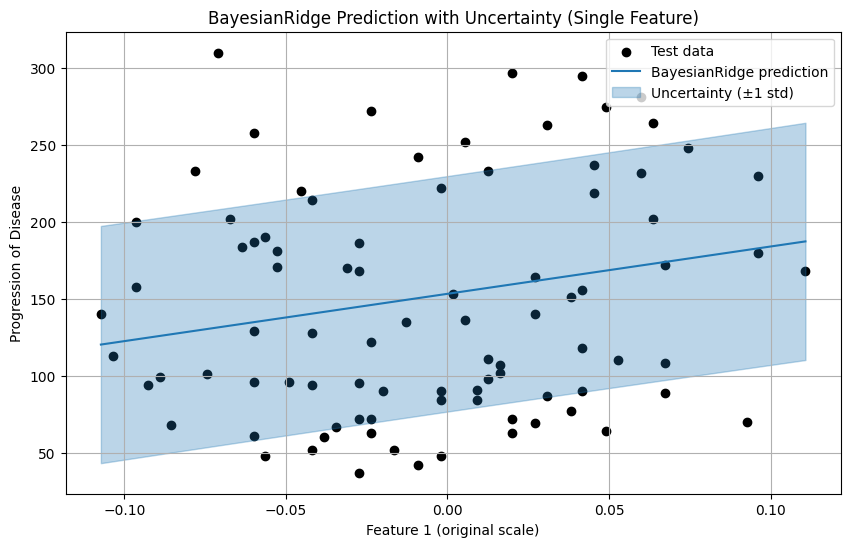

In [75]:


# Fazer previsões com incerteza para a mesma feature
X_plot = np.linspace(X_single_feature.min(), X_single_feature.max(), 100).reshape(-1, 1)
X_plot_scaled = scaler_X.transform(X_plot)
y_mean, y_std = reg.predict(X_plot_scaled, return_std=True)
y_mean_orig = scaler_y.inverse_transform(y_mean.reshape(-1, 1)).flatten()
y_std_orig = y_std * scaler_y.scale_  # Escalar o desvio padrão

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten(), color='black', label='Test data')
plt.plot(X_plot, y_mean_orig, color='tab:blue', label='BayesianRidge prediction')
plt.fill_between(X_plot.flatten(), y_mean_orig - y_std_orig, y_mean_orig + y_std_orig, color='tab:blue', alpha=0.3, label='Uncertainty (±1 std)')
plt.xlabel('Feature 1 (original scale)')
plt.ylabel('Progression of Disease')
plt.title('BayesianRidge Prediction with Uncertainty (Single Feature)')
plt.legend()
plt.grid(True)
plt.show()

Stochastic Gradient Descent

### ⚙️ Gradiente Estocástico (SGD) com Regularização

Nesta seção, descrevemos os detalhes matemáticos do procedimento **Stochastic Gradient Descent (SGD)**. Uma boa visão geral com taxas de convergência pode ser encontrada em [12].

---

#### 🧠 Definição do Problema

Dado um conjunto de exemplos de treinamento:

$$
\{(\mathbf{x}_i, y_i)\}_{i=1}^n
$$

onde:

- \( \mathbf{x}_i \in \mathbb{R}^p \): vetor de atributos da \( i \)-ésima amostra  
- \( y_i \in \mathbb{R} \) (ou \( \{ -1, +1 \} \) para classificação binária)

Nosso objetivo é aprender uma **função de pontuação linear** da forma:

$$
f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b
$$

onde:

- \( \mathbf{w} \): vetor de pesos (parâmetros do modelo)  
- \( b \): intercepto (viés)

Para tarefas de **classificação binária**, a predição é feita olhando o **sinal de \( f(\mathbf{x}) \)**:

$$
\hat{y} = \text{sign}(f(\mathbf{x}))
$$

---

####  Função Objetivo com Regularização

Para encontrar os parâmetros do modelo, minimizamos o **erro de treinamento regularizado**, dado por:

$$
\min_{\mathbf{w}, b} \ \frac{1}{n} \sum_{i=1}^n L\left(y_i, \mathbf{w}^\top \mathbf{x}_i + b\right) + \alpha R(\mathbf{w})
$$

Onde:

- \( L(y_i, f(\mathbf{x}_i)) \): **função de perda** que mede o erro entre a predição e o valor real  
- \( R(\mathbf{w}) \): **termo de regularização**, também chamado de penalidade, que controla a complexidade do modelo  
- \( \alpha \geq 0


Complexity
The major advantage of SGD is its efficiency, which is basically linear in the number of training examples. If X is a matrix of size (n, p) training has a cost of
, where k is the number of iterations (epochs) and
 is the average number of non-zero attributes per sample.

Recent theoretical results, however, show that the runtime to get some desired optimization accuracy does not increase as the training set size increases.

In [78]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [80]:
clf.coef_
clf.intercept_

array([-4.35421748, -2.29792065, -2.27594952, -2.58637557, -4.17102619,
       -1.71737249, -2.76498024, -2.37546262, -2.04659793, -2.31555291,
       -1.92688604, -1.76277088, -1.71958112, -2.85923975, -2.10742465,
       -4.71564946, -2.57896397, -2.13193472, -3.09678856, -2.36982206,
       -2.54342763, -4.0685781 , -3.77734428, -2.57831936, -1.99055413,
       -2.18253874, -2.18612418, -1.74090914, -3.77070911, -1.84238348,
       -3.14456964, -2.28912149, -2.37841606, -2.58862982, -2.9060258 ,
       -3.86050185, -2.72913997, -2.6398692 , -1.3855966 , -1.98496326,
       -2.27923538, -1.91190769, -2.35451633, -5.46301093, -4.60254287,
       -2.43624723, -2.41507568, -2.79856356, -2.11626355, -2.28361079,
       -2.36581315, -1.80567082, -2.74611553, -1.72253626, -5.36499691,
       -2.55324802, -2.3356648 , -2.00314434, -3.7980821 , -2.64500664,
       -1.76947619, -2.03430385, -1.73973375, -1.77975008, -2.56849015,
       -1.81920753, -1.57336312, -2.01968429, -2.86924309, -4.30

algoritimo voltingregressor

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes  # Usando um dataset de exemplo; substitua pelo seu


In [94]:


# Escalonar as features (boa prática para alguns modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).flatten()

# Inicializar os regressores -> usando os 3 anntigos que ja foram usados
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = GradientBoostingRegressor(n_estimators=10, random_state=1) # Adicionando GradientBoostingRegressor
vr = VotingRegressor([('lr', r1), ('rf', r2), ('gb', r3)]) # Usando GradientBoostingRegressor

# Treinar os regressores
r1.fit(X_train_scaled, y_train_scaled)
r2.fit(X_train_scaled, y_train_scaled)
r3.fit(X_train_scaled, y_train_scaled)
vr.fit(X_train_scaled, y_train_scaled)

# Fazer previsões nos dados de treinamento
y_lr_pred_scaled = r1.predict(X_train_scaled)
y_rf_pred_scaled = r2.predict(X_train_scaled)
y_gb_pred_scaled = r3.predict(X_train_scaled)
y_vr_pred_scaled = vr.predict(X_train_scaled)

# Inverter o escalonamento das previsões
y_lr_pred = scaler.inverse_transform(y_lr_pred_scaled.reshape(-1, 1)).flatten()
y_rf_pred = scaler.inverse_transform(y_rf_pred_scaled.reshape(-1, 1)).flatten()
y_gb_pred = scaler.inverse_transform(y_gb_pred_scaled.reshape(-1, 1)).flatten()
y_vr_pred = scaler.inverse_transform(y_vr_pred_scaled.reshape(-1, 1)).flatten()
y_train_orig = scaler.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()



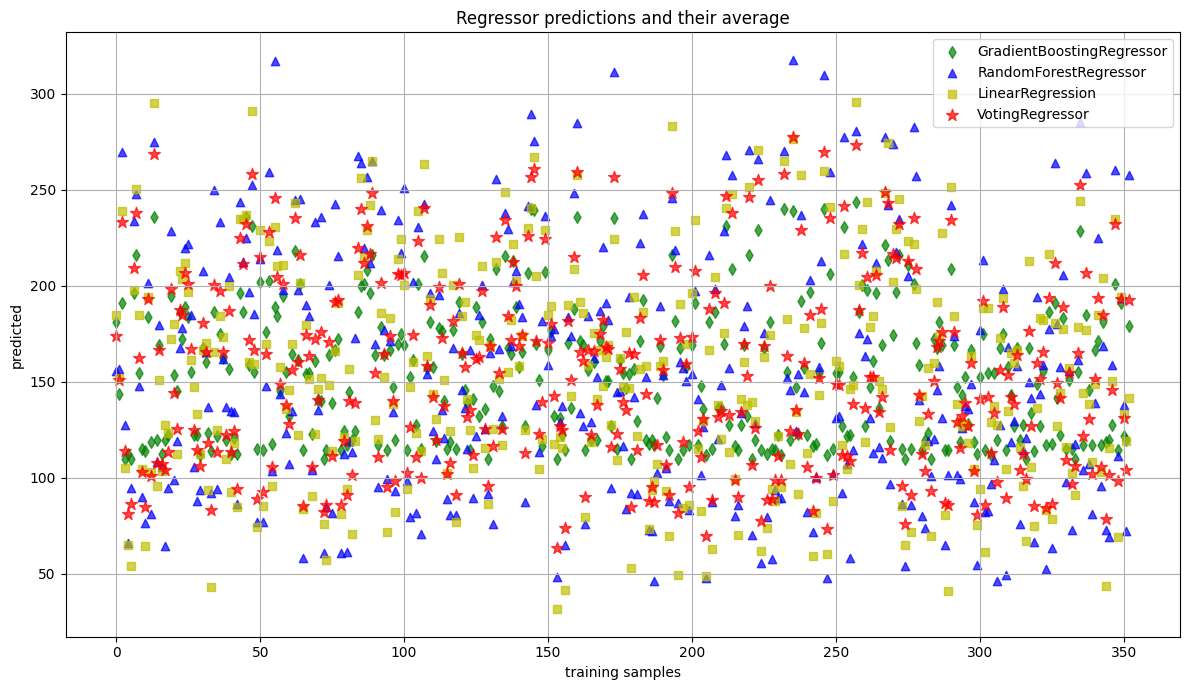

In [92]:
# Criar o plot
plt.figure(figsize=(12, 7))

# Plotar as previsões de cada regressor
plt.scatter(range(len(y_train_orig)), y_gb_pred, marker='d', color='green', label='GradientBoostingRegressor', alpha=0.7)
plt.scatter(range(len(y_train_orig)), y_rf_pred, marker='^', color='blue', label='RandomForestRegressor', alpha=0.7)
plt.scatter(range(len(y_train_orig)), y_lr_pred, marker='s', color='y', label='LinearRegression', alpha=0.7)
plt.scatter(range(len(y_train_orig)), y_vr_pred, marker='*', color='red', s=80, label='VotingRegressor', alpha=0.7)

# Adicionar rótulos e título
plt.xlabel('training samples')
plt.ylabel('predicted')
plt.title('Regressor predictions and their average')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

Nearest Neighbors Regression

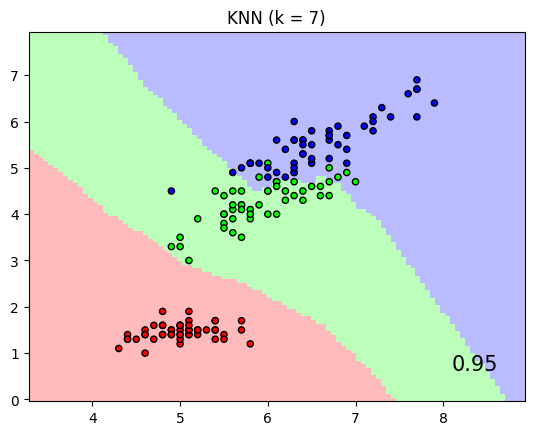

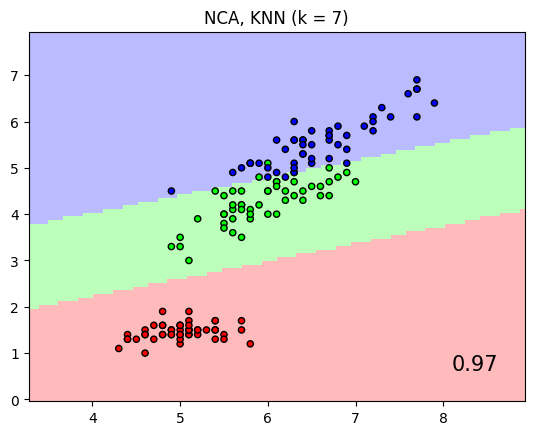

In [128]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 7

# PARA TROCAR DE PIPERLINE BASTA ALTERAR O DATASET...

dataset = datasets.load_iris()
X, Y = dataset.data, dataset.target

# we only take two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.7, random_state=42
)

h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

names = ["KNN", "NCA, KNN"]

classifiers = [
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
    Pipeline(
        [
            ("scaler", StandardScaler()),
            ("nca", NeighborhoodComponentsAnalysis()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    ),
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training and testing points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    plt.title("{} (k = {})".format(name, n_neighbors))
    plt.text(
        0.9,
        0.1,
        "{:.2f}".format(score),
        size=15,
        ha="center",
        va="center",
        transform=plt.gca().transAxes,
    )

plt.show()